In [1]:
import numpy as np
import matplotlib.pyplot as plt
from pqm import pqm_chi2, pqm_pvalue
from scipy.stats import norm, chi2, uniform, kstest

import matplotlib as mpl
mpl.rcParams['figure.dpi'] = 200
plt.rc("font", **{"family": "serif", "serif": ["Computer Modern"]})
plt.rc("text", usetex=True)

Create a distribution, and sample from it twice

In [2]:
class TimeSeriesModel:
    def __init__(self, a = 0., sigma=1., nt=100):
        self.t = np.linspace(0, 10, nt)
        self.a = a
        self.sigma = sigma
        
    def generate_samples(self, num_samples):
        # Generate samples from each component
        y = self.a * np.cos(self.t) + self.sigma * np.random.randn(num_samples, len(self.t))
        return y


In [3]:
num_repeats = 20
gmm_null = TimeSeriesModel(a = 0)

amps = np.logspace(-2, 0, 20)
chisqs_mean = np.zeros_like(amps)
chisqs_std = np.zeros_like(amps)

for i, a in enumerate(amps):
    gmm = TimeSeriesModel(a = a)
    null_samples = gmm_null.generate_samples(num_samples=5000)
    y_samples = gmm.generate_samples(num_samples=5000)
    zs = []
    dof_array = []
    for _ in range(num_repeats):
        z, dof = pqm_chi2(y_samples, null_samples)
        zs.append(z)
        dof_array.append(dof)
        
    chisqs_mean[i] = np.mean(zs)
    chisqs_std[i] = np.std(zs)
    print(a, chisqs_mean[i], chisqs_std[i], np.unique(dof_array))

0.01 96.30636018342628 16.88102327697075 [94 95 96 97 98 99]
0.012742749857031334 93.44060510553072 13.12923230813917 [94 96 97 98]
0.016237767391887217 95.85421804594543 12.06745248459765 [91 95 96 97 98 99]
0.0206913808111479 96.56384890802741 13.16272905759944 [93 95 96 97 98 99]
0.026366508987303583 101.62428751101235 13.409974586869728 [94 95 96 97 98 99]
0.03359818286283781 104.71824417061036 15.500060629077373 [92 95 96 97 98 99]
0.04281332398719394 105.7914190232439 14.139833009255605 [94 95 96 97 98 99]
0.0545559478116852 125.37501240726506 17.464758666803455 [95 96 97 98 99]
0.06951927961775606 128.24826754664255 14.251433236857022 [95 96 97 98 99]
0.08858667904100823 155.9518635513021 18.51083651839206 [94 95 96 97 98 99]
0.11288378916846889 181.10338041231262 26.070207705183687 [95 96 97 98 99]
0.14384498882876628 225.44176676424968 27.97525369027615 [93 95 96 97 98 99]
0.18329807108324356 303.81998735756247 51.20711673665269 [93 95 96 97 98 99]
0.23357214690901212 428.7071

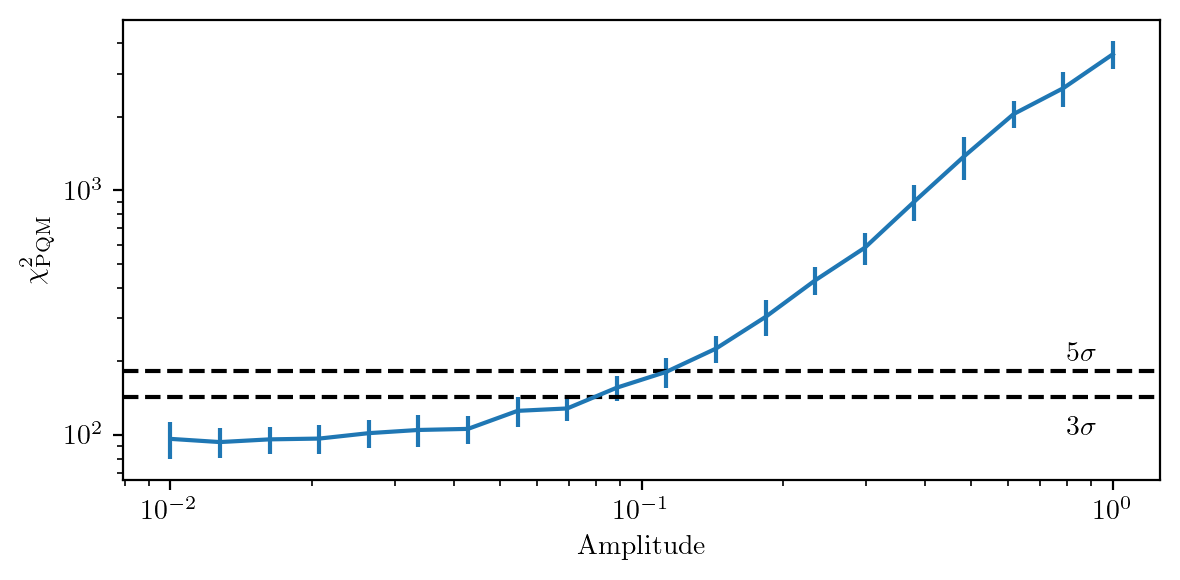

In [4]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.errorbar(amps, chisqs_mean, yerr=chisqs_std)
ax.axhline(chi2.ppf(0.997300203936740, 99), ls='--', color='k')
ax.axhline(chi2.ppf(0.999999426696856, 99), ls='--', color='k')
ax.text(0.8, 100, r'$3 \sigma$')
ax.text(0.8, 200, r'$5 \sigma$')
ax.set_xlabel('Amplitude')
ax.set_ylabel('$\chi^2_{\mathrm{ PQM}}$')
ax.set_yscale('log')
ax.set_xscale('log')
plt.tight_layout()
plt.show()

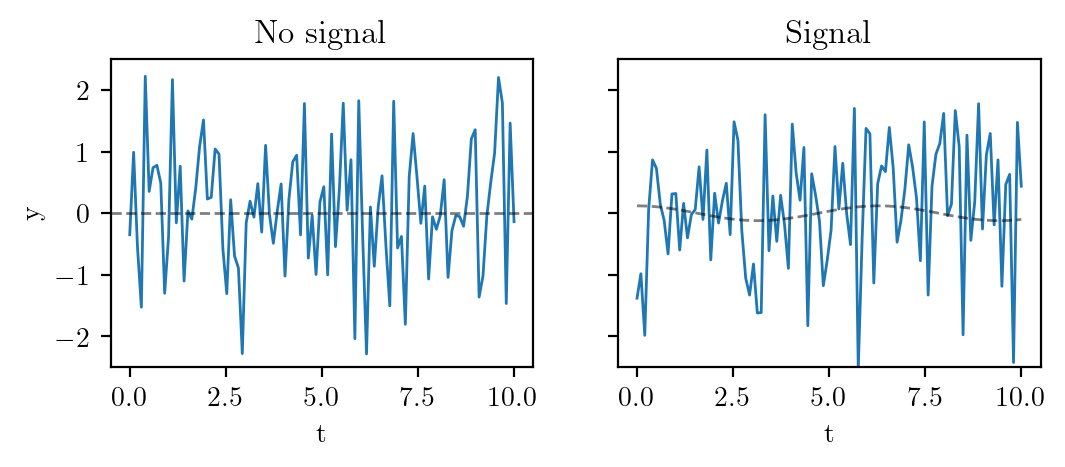

In [5]:
gmm = TimeSeriesModel(a = 0.12)
gmm_null = TimeSeriesModel(a = 0)
x_samples = gmm.generate_samples(num_samples=2)
null_samples = gmm_null.generate_samples(num_samples=2)

fig, axs = plt.subplots(nrows = 1, ncols = 2, figsize=(6, 2), sharex=True, sharey=True)
axs[0].plot(gmm.t, null_samples[0], lw=1)
axs[0].axhline(0, color='k', lw=1, ls='--', alpha=0.5)
axs[0].set_ylim([-2.5, 2.5])
axs[0].set_xlabel('t')
axs[0].set_ylabel('y')
axs[0].set_title('No signal')

axs[1].plot(gmm.t, x_samples[0], lw=1)
axs[1].plot(gmm.t, gmm.a * np.cos(gmm.t), color='k', lw=1, ls='--', alpha=0.5)
axs[1].set_ylim([-2.5, 2.5])
axs[1].set_title('Signal')
axs[1].set_xlabel('t')

plt.show()

# Using p-value

In [6]:
num_repeats = 20
gmm_null = TimeSeriesModel(a = 0)

amps = np.logspace(-2, 0, 20)
p_val_mean = np.zeros_like(amps)
p_val_std = np.zeros_like(amps)

for i, a in enumerate(amps):
    gmm = TimeSeriesModel(a = a)
    null_samples = gmm_null.generate_samples(num_samples=5000)
    y_samples = gmm.generate_samples(num_samples=5000)
    p_val = []
    for _ in range(num_repeats):
        pval = pqm_pvalue(y_samples, null_samples)
        p_val.append(pval)
    if np.mean(p_val) > 0.01:
        print("Do not reject the null hypothesis")
    else:
        print("Reject the null hypothesis")
    p_val_mean[i] = np.mean(p_val)
    p_val_std[i] = np.std(p_val)
    print(a, np.mean(p_val), np.std(p_val))

Do not reject the null hypothesis
0.01 0.4516047333886625 0.27212128864190555
Do not reject the null hypothesis
0.012742749857031334 0.45344136368451116 0.2907706937599462
Do not reject the null hypothesis
0.016237767391887217 0.42666376495871844 0.277995339745113
Do not reject the null hypothesis
0.0206913808111479 0.4153824973734281 0.3167793393765806
Do not reject the null hypothesis
0.026366508987303583 0.4039598221595793 0.28077585456643994
Do not reject the null hypothesis
0.03359818286283781 0.4012212497462394 0.3202495751559819
Do not reject the null hypothesis
0.04281332398719394 0.19177390251892829 0.16977903139987144
Do not reject the null hypothesis
0.0545559478116852 0.1924451735808717 0.19355036427541014
Do not reject the null hypothesis
0.06951927961775606 0.04657762152460906 0.08456070520983452
Do not reject the null hypothesis
0.08858667904100823 0.0541015447651817 0.16063046912869886
Reject the null hypothesis
0.11288378916846889 0.0015193226434579703 0.00335757353831

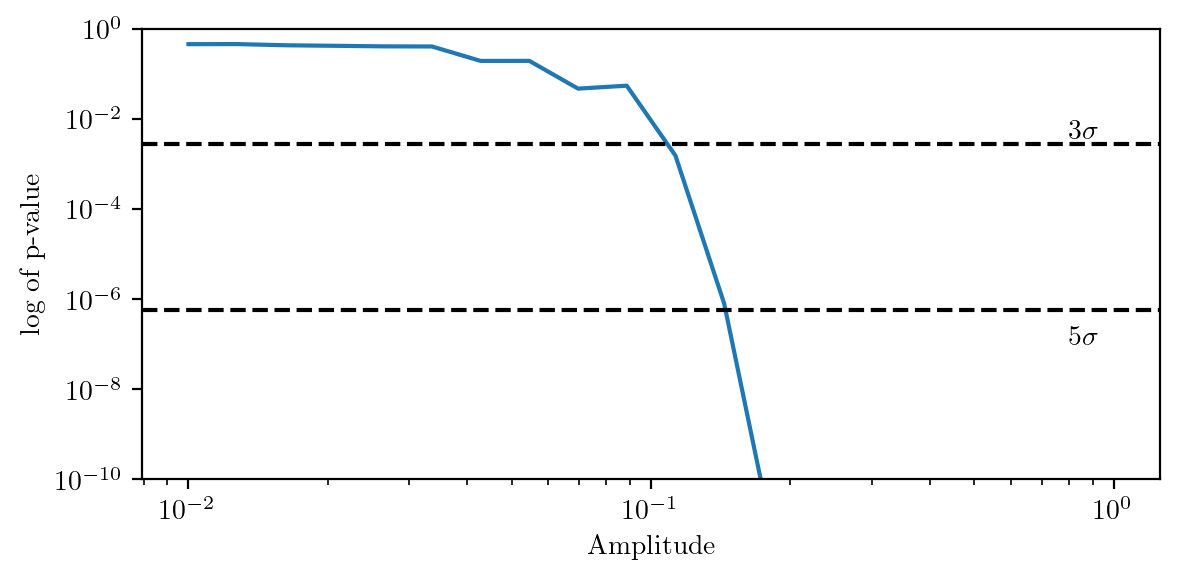

In [7]:
fig, ax = plt.subplots(figsize=(6, 3))
ax.plot(amps, p_val_mean)
ax.axhline(1 - 0.997300203936740, ls='--', color='k')  # 3 sigma equivalent p-value
ax.axhline(1 - 0.999999426696856, ls='--', color='k')  # 5 sigma equivalent p-value
ax.text(0.8, 0.01, r'$3 \sigma$', verticalalignment='top')
ax.text(0.8, 0.0000001, r'$5 \sigma$')
ax.set_xlabel('Amplitude')
ax.set_ylabel('log of p-value')
ax.set_yscale('log')
ax.set_xscale('log')
ax.set_ylim(1e-10, 1)  # Set the y-axis limits
plt.tight_layout()
plt.show()
